Este projeto tem como objetivo realizar uma **análise exploratória de dados (EDA)** e implementar um **sistema de recomendação** utilizando o **Algoritmo Apriori** para identificar padrões de compras em um conjunto de dados de comportamento do consumidor em e-commerce.

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Carregando o dataset
df = pd.read_csv('/content/ECommerce_consumer_behaviour.csv', encoding='latin-1')
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [ ]:
# Verificando o tamanho do dataset
df.shape

(2019501, 12)

In [ ]:
# verificando colunas duplicadas
df.duplicated().sum()

np.int64(0)

In [ ]:
# Verificando se existe valores nulos
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64


In [ ]:
# Verificando informações sobre o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [ ]:
# Verificando as estatísticas descritivas
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


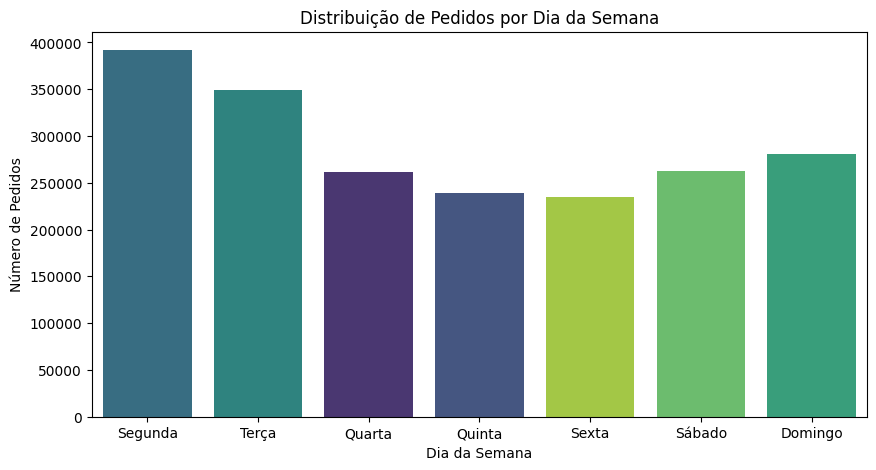

In [2]:
# Mapeando números para nomes dos dias da semana
dias_semana = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta',
               4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}

df['order_dow_nome'] = df['order_dow'].map(dias_semana)

# Contagem de pedidos por dia da semana
plt.figure(figsize=(10, 5))
sns.countplot(x=df['order_dow_nome'],
              hue=df['order_dow_nome'],
              order=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'],
              palette='viridis',
              legend=False)
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Pedidos")
plt.title("Distribuição de Pedidos por Dia da Semana")
plt.show()

Como podemos ver no gráfico de Distribuição de Pedidos por Dia da Semana, o maior volume de compras ocorre no início da semana, especialmente na segunda-feira. Com isso, a empresa pode aproveitar segundas e terças-feiras para lançar promoções e novos produtos, maximizando a exposição e as vendas. Já o menor movimento no meio da semana pode ser uma oportunidade para campanhas de marketing direcionadas, incentivando compras nesses dias. Esses insights ajudam a otimizar estratégias de vendas e gestão de estoque.

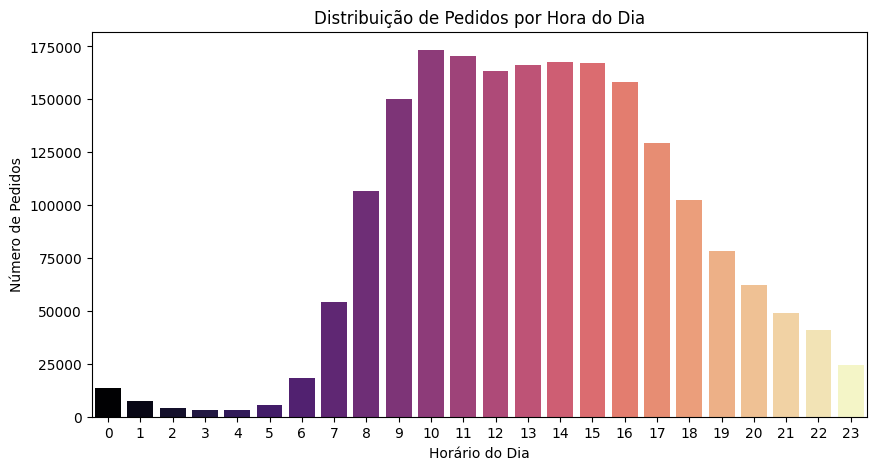

In [ ]:
# Contagem de pedidos por hora do dia
# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.countplot(x=df['order_hour_of_day'], hue=df['order_hour_of_day'], palette='magma', legend=False)
plt.xlabel("Horário do Dia")
plt.ylabel("Número de Pedidos")
plt.title("Distribuição de Pedidos por Hora do Dia")
plt.show()

Como podemos ver no gráfico de Distribuição de Pedidos por Hora do Dia, o horário de pico, ou seja, em que ocorrem o maior número de Pedidos, são das **10h** as **16h**. Logo, algumas ações estratégicas podem ser tomadas para serem usadas durante esses horários como promoções em tempo real, vendas relâmpago e suporte ao cliente.  

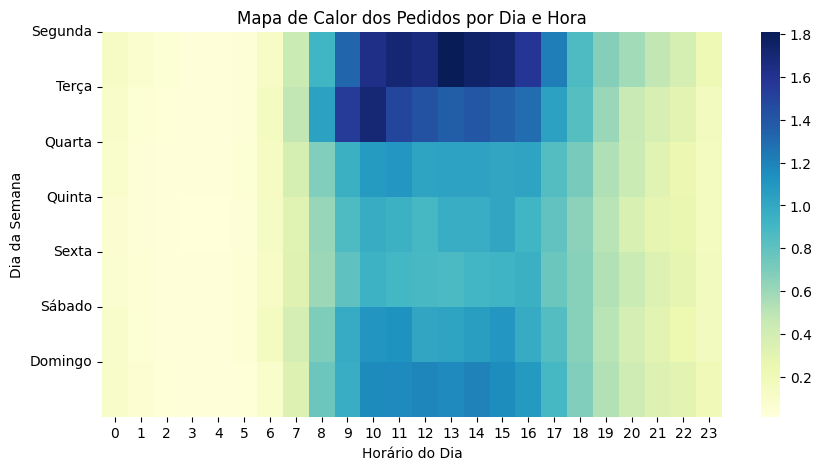

In [ ]:
# Agrupando os dados por dia da semana e hora do pedido e contando os pedidos
dia_hora_df = df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

# Criando uma tabela pivô para os dados
dia_hora_df_piv = dia_hora_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

# Normalizando os valores e transformando para porcentagem
dia_hora_df_piv_porcentage = (dia_hora_df_piv / df.shape[0]) * 100

# Criando o gráfico heatmap
plt.figure(figsize=(10,5))
sns.heatmap(dia_hora_df_piv_porcentage, cmap='YlGnBu', annot=False, fmt='.4f', cbar=True)
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'], rotation=0)
plt.xlabel("Horário do Dia")
plt.ylabel("Dia da Semana")
plt.title("Mapa de Calor dos Pedidos por Dia e Hora")
plt.show()

O mapa de calor mostra que as compras ocorrem com maior frequência entre **8h e 17h**, com picos nas **segundas** e **terças-feiras**. Isso indica que esses dias e horários são estratégicos para ações como:
- Posicionar anúncios nos horários de maior compra para aumentar conversões.  
- Criar ofertas personalizadas nos períodos de menor movimento para impulsionar a demanda.  
- Ajustar preços dinamicamente para equilibrar oferta e demanda.  
- Garantir que a plataforma suporte o aumento de acessos sem problemas técnicos.

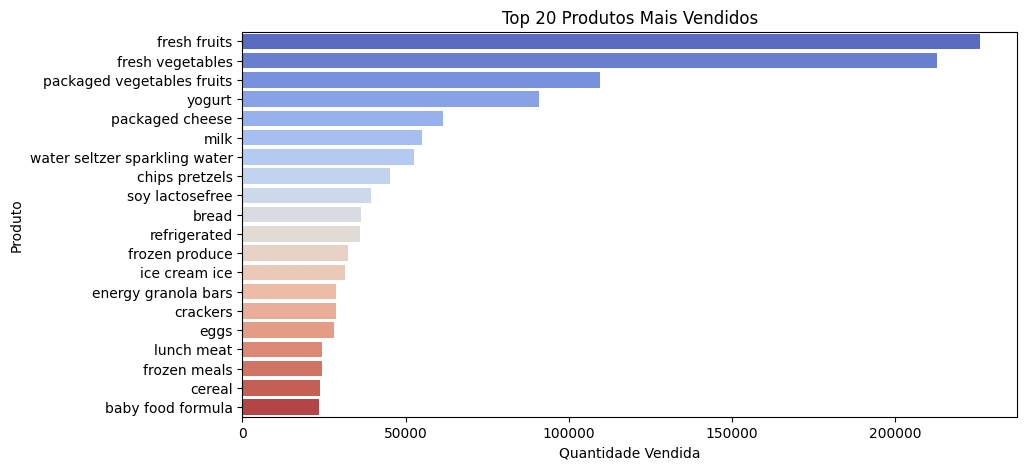

In [ ]:
# Top 20 produtos mais vendidos
top_produtos = df['product_name'].value_counts().head(20)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 5))
sns.barplot(x=top_produtos.values, y=top_produtos.index,
            hue=top_produtos.index, palette="coolwarm", legend=False)
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.title("Top 20 Produtos Mais Vendidos")
plt.show()

O gráfico de **Top 20 Produtos Mais Vendidos** revela quais itens têm maior demanda entre os consumidores, fornecendo insights valiosos como:

- **Preferências do consumidor:** Produtos no topo do ranking são essenciais para os clientes e podem indicar tendências de compra.  

- **Gestão de estoque:** Itens mais vendidos precisam ter disponibilidade garantida para evitar rupturas de estoque e perda de vendas.  

- **Estratégias de marketing:** Produtos populares podem ser usados para promoções cruzadas (cross-selling) ou descontos estratégicos para atrair mais clientes.  

- **Agrupamento por categorias:** Se produtos de um mesmo tipo dominam a lista, isso pode indicar uma preferência de nicho e direcionar esforços para expandir essa linha de produtos.  

- **Precificação dinâmica:** Produtos mais vendidos podem ter ajustes de preços estratégicos para maximizar lucros sem comprometer a demanda.

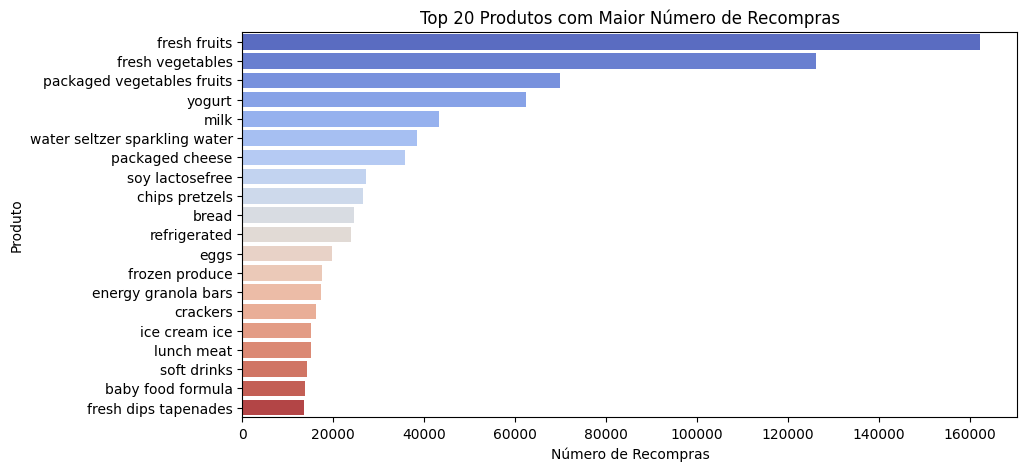

In [ ]:
# Agrupando os produtos pelo número de recompras
recompra_produto_count = df.groupby('product_name')['reordered'].sum().sort_values(ascending=False)

# Selecionando os 20 produtos com maior número de recompras
top_recompra_produtos = recompra_produto_count.head(20)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 5))
sns.barplot(x=top_recompra_produtos.values, y=top_recompra_produtos.index,
            hue=top_recompra_produtos.index, palette="coolwarm", legend=False)
plt.xlabel("Número de Recompras")
plt.ylabel("Produto")
plt.title("Top 20 Produtos com Maior Número de Recompras")
plt.show()

O gráfico de **Top 20 Produtos com Maior Número de Recompras** revela quais itens são mais frequentemente comprados novamente pelos consumidores, fornecendo insights valiosos sobre fidelização de clientes e padrões de consumo. Alguns dos principais insights são:

- **Alto valor de retenção:** Produtos com alta recompra são essenciais para os clientes e podem indicar itens de necessidade recorrente, como alimentos, produtos de higiene ou itens básicos do dia a dia.  

- **Oportunidades para assinaturas e descontos:** Itens com alta recompra podem ser promovidos em planos de assinatura ou descontos progressivos para incentivar compras recorrentes.  

- **Gestão de estoque estratégica:** Manter um estoque otimizado desses produtos reduz o risco de falta, garantindo a satisfação do cliente e evitando perda de vendas.  

- **Agrupamento de compras:** Se certos produtos são frequentemente recomprados juntos, isso pode sugerir a criação de combos promocionais ou recomendações personalizadas.  

- **Identificação de fidelidade à marca:** Caso um mesmo produto tenha alta recompra, pode indicar forte preferência pela marca, criando oportunidades para parcerias e exclusividades.  

- **Previsão de demanda mais precisa:** Produtos com alta recompra ajudam a empresa a prever melhor o fluxo de vendas e ajustar a cadeia de suprimentos para atender à demanda sem excesso de estoque.

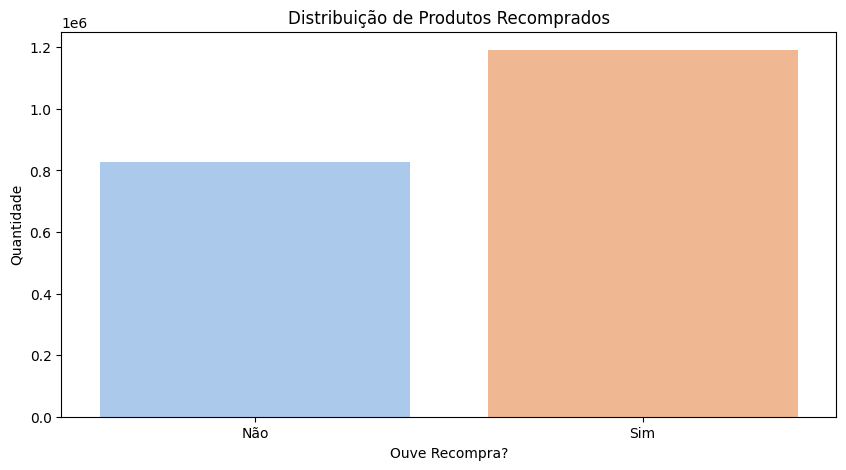

Taxa de Recompra: 58.97%


In [ ]:
# Contagem de recompras
plt.figure(figsize=(10, 5))
sns.countplot(x=df['reordered'], hue=df['reordered'], palette="pastel", legend=False)
plt.xlabel("Houve Recompra?")
plt.ylabel("Quantidade")
plt.title("Distribuição de Produtos Recomprados")
plt.xticks([0, 1], ["Não", "Sim"])
plt.show()

# Porcentagem do total de recompras
reorder_rate = df['reordered'].mean() * 100
print(f"Taxa de Recompra: {reorder_rate:.2f}%")

A análise da **Distribuição de Produtos Recomprados** revela que **58,97%** dos pedidos envolvem produtos que já foram comprados anteriormente pelo mesmo usuario, destacando um forte comportamento de recompra entre os consumidores, dessa análise podemos retirar alguns insights como:

- **Fidelização de clientes:** A alta taxa de recompra sugere que muitos consumidores mantêm hábitos de compra recorrentes, o que pode indicar satisfação com os produtos e a experiência de compra.  

- **Oportunidades para programas de fidelidade:** Como mais da metade das compras incluem itens já adquiridos antes, a empresa pode implementar programas de recompra, como descontos progressivos ou cashback para incentivar ainda mais a retenção.  

- **Sugestões personalizadas:** Com base nesse comportamento, o sistema pode oferecer recomendações automáticas de produtos frequentemente recompra­dos por cada cliente, aumentando as chances de conversão.  

- **Planejamento de estoque:** Produtos com alta recompra devem ter reposição otimizada para evitar rupturas e garantir que os clientes encontrem sempre os itens que costumam comprar.  

- **Marketing direcionado:** Campanhas de e-mail ou notificações podem lembrar os clientes de recomprar itens que eles costumam consumir em um determinado período, melhorando o engajamento e as vendas.  

Essa análise reforça a importância de estratégias voltadas à retenção de clientes, utilizando personalização, otimização de estoque e incentivos à recompra para maximizar o faturamento e a experiência do consumidor.

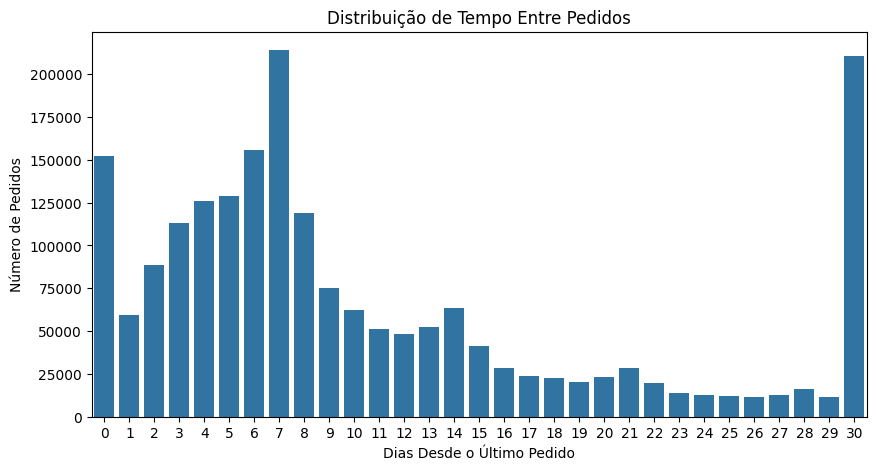

In [6]:
# Convertendo para inteiro
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0).astype(int)

# Contando a frequência de cada valor em 'days_since_prior_order'
order_gap_counts = df['days_since_prior_order'].value_counts().sort_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=order_gap_counts.index, y=order_gap_counts.values)
plt.xlabel("Dias Desde o Último Pedido")
plt.ylabel("Número de Pedidos")
plt.title("Distribuição de Tempo Entre Pedidos")
plt.xticks(rotation=0)
plt.show()

A distribuição do tempo entre pedidos revela que a maioria dos consumidores fazem compras em ciclos **semanais (a cada 7 dias)** e **mensais (a cada 30 dias)**. Isso sugere padrões regulares de consumo, possivelmente relacionados ao reabastecimento de itens essenciais ou compras planejadas conforme a rotina financeira dos clientes.  
- **Ciclo semanal (7 dias):** Indica que muitos consumidores fazem compras recorrentes, possivelmente de itens perecíveis ou de necessidade diária. Promoções semanais podem incentivar a fidelização.  
- **Ciclo mensal (30 dias):** Pode estar ligado a pagamentos mensais, indicando que consumidores fazem grandes compras ao receberem seus salários. Estratégias como cupons para compras recorrentes podem aumentar a retenção.  
- **Outros picos menores:** Além dos ciclos principais, pode haver compras esporádicas, sugerindo que campanhas de remarketing podem reativar clientes antes que eles esperem um ciclo completo para comprar novamente.  

Com base nesses padrões, a empresa pode otimizar campanhas de marketing, reposição de estoque e programas de fidelidade, garantindo ofertas no momento certo para maximizar as vendas.

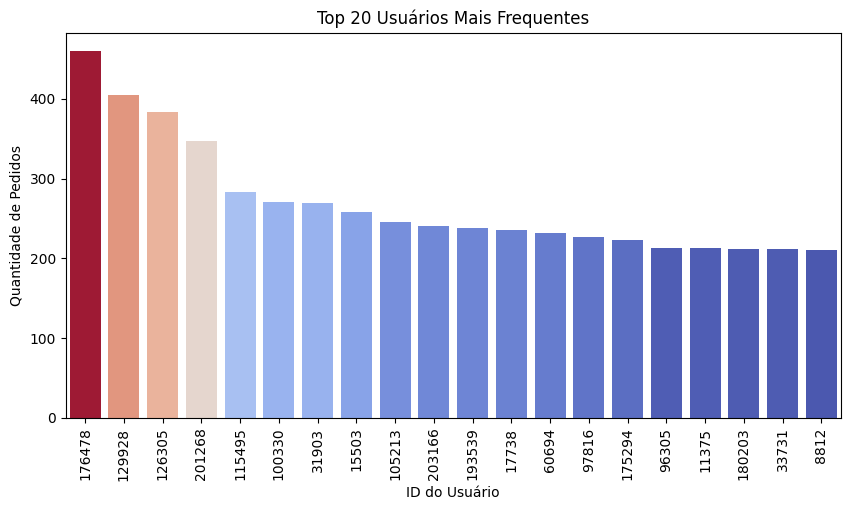

In [ ]:
# Contando os pedidos por usuário e ordenando em ordem decrescente
usuarios_mais_frequentes = df['user_id'].value_counts().sort_values(ascending=False)

# Selecionando os 20 usuários mais frequentes
top_20_usuarios_mais_frequentes = usuarios_mais_frequentes.head(20)

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=top_20_usuarios_mais_frequentes.index,
            y=top_20_usuarios_mais_frequentes.values,
            hue=top_20_usuarios_mais_frequentes.values,
            order=top_20_usuarios_mais_frequentes.index,
            palette="coolwarm",
            legend=False)
plt.title("Top 20 Usuários Mais Frequentes")
plt.xlabel('ID do Usuário')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=90)
plt.show()

A análise do **Top 20 Usuários Mais Frequentes** revela quais clientes realizam o maior número de pedidos, fornecendo insights estratégicos sobre o comportamento de compra e oportunidades para fidelização.  

- **Clientes VIP:** Os usuários mais frequentes representam uma base de consumidores fiéis, que podem ser alvo de programas de recompensas, descontos exclusivos ou ofertas personalizadas para aumentar ainda mais o engajamento.  

- **Valor do cliente ao longo do tempo (LTV):** Clientes recorrentes costumam ter um alto Lifetime Value (LTV), ou seja, geram um faturamento significativo ao longo do tempo. Estratégias para aumentar o ticket médio e incentivar compras adicionais podem ser altamente eficazes.  

- **Segmentação de público:** Esses consumidores podem ser estudados para entender quais produtos compram com mais frequência, quais categorias preferem e em quais horários costumam realizar pedidos, auxiliando em campanhas de marketing mais direcionadas.  

- **Recomendações personalizadas:** Com base no histórico desses usuários, é possível melhorar os sistemas de recomendações de produtos e sugestões de compras recorrentes, aumentando as taxas de conversão.  

- **Risco de dependência de poucos clientes:** Se uma grande parte das compras vem de um pequeno grupo de clientes, pode ser um risco para a empresa. Estratégias para atrair novos consumidores e diversificar a base de clientes devem ser consideradas.  

Essa análise é fundamental para otimizar estratégias de retenção, personalização de ofertas e gestão do relacionamento com os clientes, garantindo que os consumidores mais valiosos continuem comprando e fortalecendo a empresa no longo prazo.

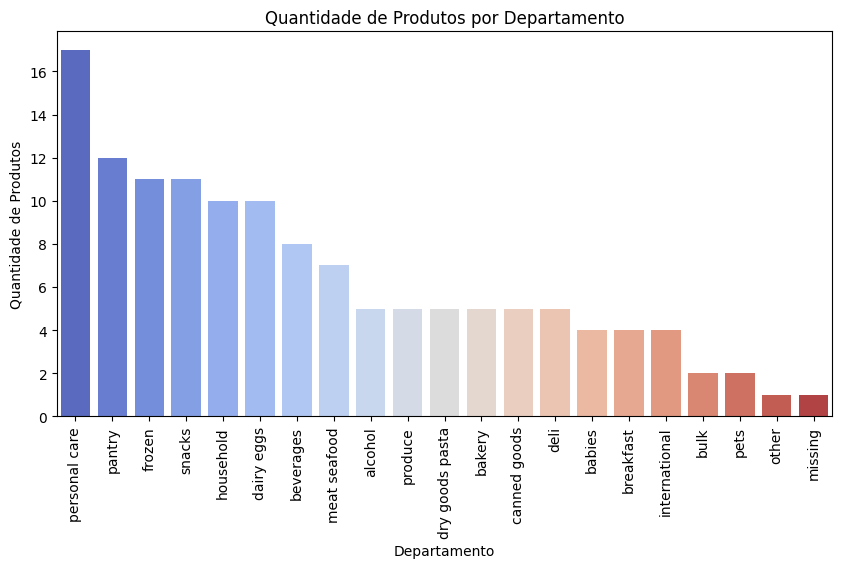

In [ ]:
# Agrupando por departamento e contando a quantidade de produtos
quantidade_por_departamento = df.groupby('department')['product_name'].unique().apply(len).sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=quantidade_por_departamento.index,
            y=quantidade_por_departamento.values,
            hue=quantidade_por_departamento.index,
            palette="coolwarm",
            legend=False)
plt.xlabel('Departamento')
plt.ylabel('Quantidade de Produtos')
plt.title('Quantidade de Produtos por Departamento')
plt.xticks(rotation=90)
plt.show()

A análise da **Quantidade de Produtos por Departamento** mostra a distribuição dos produtos entre os diferentes setores, ajudando a entender quais categorias possuem maior diversidade de itens disponíveis.

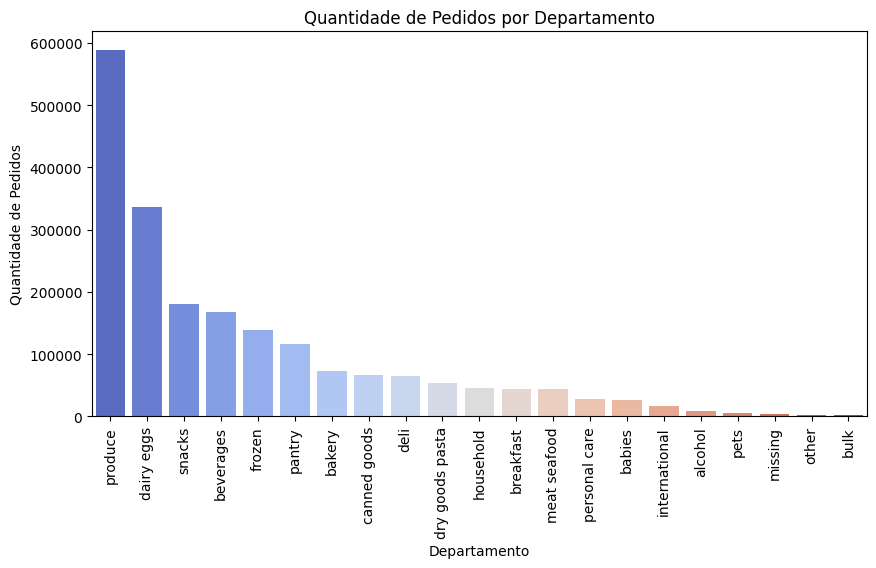

In [ ]:
# Agrupando por departamento e contando a quantidade de produtos
quantidade_por_departamento = df.groupby('department')['product_name'].count().sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=quantidade_por_departamento.index,
            y=quantidade_por_departamento.values,
            hue=quantidade_por_departamento.index,
            palette="coolwarm",
            legend=False)
plt.xlabel('Departamento')
plt.ylabel('Quantidade de Pedidos')
plt.title('Quantidade de Pedidos por Departamento')
plt.xticks(rotation=90)
plt.show()

A análise da **Quantidade de Pedidos por Departamento** revela quais categorias de produtos são mais populares entre os clientes, fornecendo insights valiosos para estratégias de vendas e gestão de estoque.  

- **Departamentos mais vendidos:** Categorias com maior volume de pedidos indicam alta demanda e podem ser priorizadas em campanhas promocionais, além de exigirem um estoque bem abastecido para evitar rupturas.  

- **Desempenho comparado à variedade de produtos:** Ao cruzar essa análise com a quantidade de produtos por departamento, é possível identificar se um alto número de pedidos está concentrado em poucos produtos ou se há uma distribuição equilibrada dentro do departamento.  

- **Oportunidades para departamentos menos populares:** Categorias com menor volume de pedidos podem se beneficiar de estratégias promocionais, recomendações personalizadas e melhorias na visibilidade no site para impulsionar as vendas.  

- **Influência na precificação:** Departamentos com alta demanda podem ser explorados para estratégias dinâmicas de precificação, como ajustes sazonais ou promoções estratégicas para aumentar a margem de lucro.  

- **Impacto nas recomendações de produtos:** Saber quais departamentos geram mais pedidos ajuda na personalização do sistema de recomendação, sugerindo produtos relevantes aos clientes com base em suas compras anteriores.  

Essa análise é essencial para entender o comportamento de compra dos clientes e otimizar a gestão de categorias, garantindo que os departamentos mais populares sejam bem atendidos e que aqueles menos procurados recebam atenção estratégica.

In [7]:
# Criando a tabela de transações (cada pedido será uma linha, e cada produto terá um valor 1 ou 0)
basket = df.pivot_table(index='order_id', columns='product_name', values='add_to_cart_order', aggfunc='count').fillna(0)

# Convertendo para valores binários (1 = comprado, 0 = não comprado)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket.head()

<ipython-input-7-1cad4ade091c>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Aplicando o algoritmo Apriori para encontrar conjuntos de itens frequentes
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Gerando regras de associação a partir dos conjuntos de itens frequentes
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.shape

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


(384, 14)

In [ ]:
# Exibindo as regras mais relevantes
sorted_rules = rules.sort_values(by = 'lift', ascending = False)
regras_produto = sorted_rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.2)]
pd.set_option('display.max_rows', None)
regras_produto[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20)

<ipython-input-23-1108559ca3bb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  regras_produto = sorted_rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.2)]


,antecedents,consequents,support,confidence,lift
191,(fresh herbs),"(fresh fruits, fresh vegetables)",0.061815,0.664642,2.092964
187,"(fresh fruits, fresh herbs)",(fresh vegetables),0.061815,0.881372,1.983463
374,"(fresh fruits, packaged vegetables fruits)","(fresh vegetables, yogurt)",0.076240,0.282506,1.952899
379,"(fresh vegetables, yogurt)","(fresh fruits, packaged vegetables fruits)",0.076240,0.527029,1.952899
87,(fresh herbs),(fresh vegetables),0.078655,0.845707,1.903203
362,"(fresh fruits, fresh vegetables)","(packaged vegetables fruits, packaged cheese)",0.068325,0.215156,1.877290
363,"(packaged vegetables fruits, packaged cheese)","(fresh fruits, fresh vegetables)",0.068325,0.596152,1.877290
378,"(yogurt, packaged vegetables fruits)","(fresh fruits, fresh vegetables)",0.076240,0.596044,1.876950
375,"(fresh fruits, fresh vegetables)","(yogurt, packaged vegetables fruits)",0.076240,0.240081,1.876950
364,"(fresh vegetables, packaged vegetables fruits)","(fresh fruits, packaged cheese)",0.068325,0.291296,1.868482


### **Conclusão para a Regra de Associação obtida**  

Vamos fazer uma análise rápida sobre a regra de associação da primeira linha da tabela, número 191 **(fresh herbs) → (fresh fruits, fresh vegetables)**. Ela indica que clientes que compram **ervas frescas** têm uma forte tendência a comprar também **frutas frescas e vegetais frescos**.  

 **Interpretação dos Indicadores:**  
- **Suporte = 6,18%** → A combinação de ervas frescas com frutas e vegetais aparece em **6,18% de todas as transações** do dataset. Isso mostra que essa associação ocorre com frequência relevante.  
- **Confiança = 66,46%** → Quando um cliente compra **ervas frescas**, há **66,46% de chance** de que ele também compre frutas e vegetais frescos. Esse valor indica uma relação forte entre esses produtos.  
- **Lift = 2,09** → Esse valor mostra que a compra de ervas frescas **aumenta em 2,09 vezes a probabilidade** de o cliente comprar frutas e vegetais, comparado a compras aleatórias. Como o lift é maior que 1, isso confirma que há uma **associação positiva e significativa** entre esses produtos.